In [0]:
›import scipy
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels
from scipy.stats import norm
from scipy import log,exp,sqrt,stats
from scipy.interpolate import interp1d
%matplotlib inline

We want to calculate the implied distribution of $S_T$. So we first try to get the close-form formula.

By the definition of non-arbitrage pricing:
\begin{equation}
\begin{aligned}
C(k) &= e^{-r\tau} \int_{k}^{\infty}(S_T -k) \rho(S_T)dS_T \\
     &= e^{-r\tau} \int_{0}^{\infty}(S_T -k) \rho(S_T)I_{\{S_{T} - k \geq 0\}}dS_T
\end{aligned}
\end{equation}

\begin{equation}
\frac{\partial{C(k)}}{\partial{k}} = - e^{-r\tau} \int_{k}^{\infty}\rho(S_T)dS_T
\end{equation}

\begin{equation}
\frac{\partial^2{C(k)}}{\partial{k^2}} = e^{-r\tau} \rho(S_T)dS_T
\end{equation}

\begin{equation}
\frac{\partial^2{C(k)}}{\partial{k^2}} = e^{-r\tau} \rho(S_T)dS_T
\end{equation}

So we have :
\begin{equation}
\rho(S_T)= e^{r\tau} \frac{\partial^2{C(k)}}{\partial{k^2}}
\end{equation}
Since $r=0$, We only need to calculate $\frac{\partial^2{C(k)}}{\partial{k^2}}$

As we can see from the problem, we have the data point for 20 pairs of (strike,implied volatility), and the spot price is 2000(since there is no interest rate).

To make some preparation, we define the function of Black-Sholes Formula and set up the dataset for this question as below:

In [0]:
## Preparation
## BS-formula for call options
def bs_call(S,X,T,r,sigma):
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2)

In [0]:
## set our dataset
data = {
        'strike': range(2900,900,-100),
        'volatility': [0.05, 0.07, 0.08, 0.1, 0.12, 0.13, 0.15,0.16, 0.18, 0.19,0.21,0.23,0.24,\
                       0.26,0.28,0.29,0.31,0.33,0.34,0.35],
        }
## dataframe for pairwise data (strike,volatility)
strike = np.array(pair_data.ix['strike'])

## spot price, calculated with 0 interest rate
spot_price = 2000

## series for strike
pair_data = DataFrame(data).T 

## series for volatility
volatility = np.array(pair_data.ix['volatility']) 

## we can calculate call-option price with given strike price and implied volatility
call_price = np.array([bs_call(2000,strike[i],1,0,volatility[i]) for i in range(20)])
# for i in range(20):
#     print strike[i],volatility[i],call_price[i],bs_call(2000,strike[i],1,0,volatility[i])

For Question1, we can directly draw the picture as below:

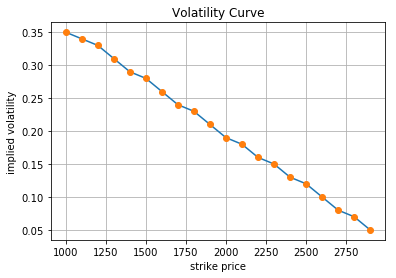

In [0]:
plt.plot(strike,volatility)
plt.plot(strike,volatility,'o')
plt.grid(True)  
plt.axis('tight') 
plt.xlabel('strike price')
plt.ylabel('implied volatility')
plt.title('Volatility Curve')

As we can see from the picture above, the volatility curve looks like a linear function of strike price, when the strike price go higher, the implied volatility may go down. And they have approximately linear relationship between them.

This may happen because for investors, they may be afraid of the downside move much more than they are happy to see the upside move. Since option is a way to try to void risk, investors may pay more for a protection rather than make profit.

By Black-Sholes Formula:
$$ C = SN(d_{+}) - Ke^{-r\tau}N(d_{-})$$

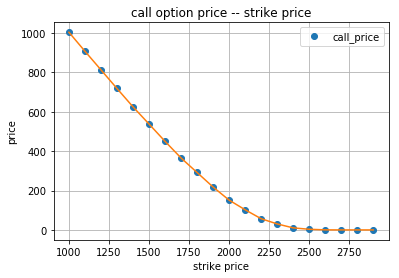

In [0]:
## plot the Call-option price v.s. strike price
plt.plot(strike,call_price,'o')
plt.plot(strike,call_price)
plt.xlabel('strike price')
plt.ylabel('price')
plt.grid(True)  
plt.axis('tight') 
plt.title('call option price -- strike price')
plt.legend([ 'call_price'], loc='best')

This is the scatter plot and auto-fitted curve(by matplotlib in python). The call option price goes down when the stock price goes higher.

For Question2:
To calculate the implied probability density function based on the information, we need to calculate the second-order partial derivatives at each call option price w.r.t strike k. 

The simplest way is to do simple linear difference. Use the slope to approximate the first order derivatives then do the same to approximate the second order derivatives. Since the interval between two strike price are the same $h = 100$, we can use the following formula:



\begin{equation}
\frac{\partial{C(k_i)}} {\partial{k_i}} \approx  \frac{ C(k_{i+1}) -2C(k_{i})+ C(k_{i - 1}) } {h^2}
\end{equation}
Here $k_i - k_{i-1} = h = 100$

In [0]:
## naive way: just do differential or order 2
second_order = [(call_price[i+1] + call_price[i-1] - 2*call_price[i])/100.0**2 for i in range(1,19)] 

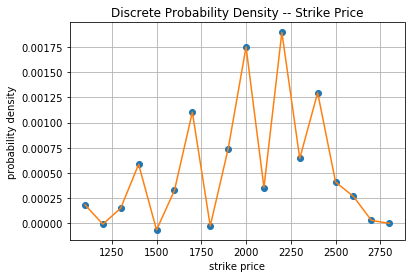

In [0]:
plt.plot(strike[1:19],second_order,'o')
plt.plot(strike[1:19],second_order)
plt.xlabel('strike price')
plt.ylabel('probability density')
plt.grid(True)  
plt.axis('tight') 
plt.title('Discrete Probability Density -- Strike Price')

$$\hat S = \frac{1}{n}{\sum\limits_{i = 1}^n {\left( {\frac{{{X_i} - \bar X}}{{\hat \sigma }}} \right)} ^3}$$

For Question4:
Yes we can get same conclusion as in Step3 directly from the observation in step 1.
We can see from Question1 that for a lower strike price, its

To fit the curve of call option price, we need to do nonparametic estimation. 

Here I come up with two of these methods.

The first is called locally - weighted -linear-regression
For a simple or naive weighted linear regression, we can easily derive the close-form formula:
\begin{equation}
E(Y|X) = X\beta, Var(Y|X) = \sigma^2 W^{-1}
\end{equation}

Here $W$ denotes the weight matrix.So in order to minimize the weighted squares:
\begin{equation}
RSS_{w}(\beta) = (Y-X\beta)^{'}W(Y-X\beta) = Y^{'}WY + \beta^{'}(X^{'}WX)\beta - 2Y^{'}WX\beta
\end{equation}

The WLS estimator solves the weighted normal equations
$$ X^{'}WX\beta = X^{'}WY$$

So the WLS estimate is :
\begin{equation}
w=(X^TWX)^{−1}X^TWY
\end{equation}

Above is the original weighted least square regression and its solution.

But it's paramatic and needs the assumption for the model. So here we take the method of 'Locally weighted linear regression', which is non-paramatic and can help us fit the curve with the scatter plots(limited data) in any given local point.

Basiclly, locally weighted linear regression does regression in every local point $x_0$, and only get the result of fitted value $f(x_0)$ or locally parameter for the regression (e.g. we assume that in each local point, the regression has the form of polynomial, we can get the parameters of the polynomial at each local point $x_0$).

Different from weighted linear regression, locally version of weighted linear regression needs to calculate at every selected point, so it cost lots of computation. But when we only have limited data and do not have any information about the assumption of the model, we can apply this non- parametic method to fit the curve.

When we do local regression, we usually try to minimize $\sum_{i}\omega^{i}(y_{i} - x^{i}\beta)$, where $\omega^{i}$ is the local weight when we consider the model at given $x_0$. We often take the form of $$ \omega^{i} = exp(-\frac{||x^{i} - x||}{2k^{2}})$$, or other kinds of 'kernal function'. This implies that  if our sample points is close to local point $x_0$,we would give it more weight, if it is far away, we would give it small weight.


Here we give an example of this kernal function:

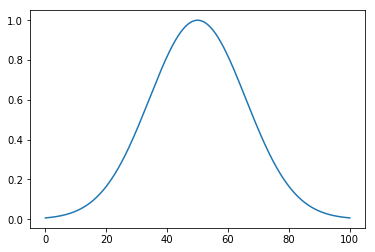

In [0]:
## Sample to show w_i:
weight_x = np.linspace(0,100,1000)
weight_y = []
for value in weight_x:   
    weight_y.append (np.exp((value- 50.0)**2/(-500)))
plt.plot(weight_x,weight_y)

Then we prepare data for the Locally Weighted Linear Regression(LWLR for short) methods.

In [0]:
## another step: make our data in the form of numpy matrix, easy for doing local weighted regression

##[1,1,...,1] 1 for 20 times
ones = np.ones(20)
##input_X: strike and its second order 
input_X = np.matrix(strike).T
input_X = np.c_[ones,input_X]
input_X = np.c_[input_X,(strike*strike).T]

##matrix_call_price : call-option price in matrix form
matrix_call_price = np.matrix(call_price).T

Then we can write by ourself a function to do the Locally Weighted Linear Regression (LWLR):

Here we make an assumption that at each local point $x_0$, as its name in the function, our fitted function is a polynomial with degree = 2. To be more explicit, our fitted function at $x_0$ takes the form of $\hat{C(x_0)} = \alpha_0 + \alpha_{1}x_0 + \alpha_{2}x_0^{2}$, and in order to get the second-order partial derivatives $\frac{\partial^2{C(k)}}{\partial{k^2}}$, we only need to get the parameter $2*\alpha_2$, and my function can get it by the parameter 'how'.

In [0]:
def LWLR(X, Y, x0, k=1.,how = 3):
    ##LWLR: short for Locally Weighted Linear Regression
    ## X.T : matrix of [1,x,x^2] since we need to calculate the second-order  partial derivative
    ## X.T[0] : all 1;  X.T[1] : actuall x; X.T[2]: x^2;
    ## Y : call price; locally we do regression of Y~(1,x,x^2)
    ## x0: The local point where we do prediction
    ## k : the parameter to decide the kernel funtion for the change of weight
    ## return value : our final calculation is a list with name 'result'
    ## result[0] = intercept at each local point; 
    ## result[1] = the parameter of the 1st order; 
    ## result[2] = the parameter of the 2nd order; 
    ## result[3] = the prediction or mathematically, x0*ws, x0 for local point, ws for local weight
    ## how: determine the return value type. The number determine which dimension is the return value.
    
    result = [0]*4  ## set up the return value
    all_x0 = [1,x0,x0**2] ## set up the vector for local point x0
    diag_value = [] ## record the diagnal value of the local-weight matrix
    nparray_X = np.array(X.T[1])[0] ## get the actuall distance ; nparray_X is numpy.ndarray
    
    ## calculate the weight
    for value in nparray_X:
        diag_value.append(np.exp((value-x0)**2/(-2*k**2)))
    
    ## construct a diagnal matrix as the local-weight matrix     
    W = np.diag(diag_value) 
    
    ## calculate by formula
    xTx = X.T.dot(W).dot(X)
    
    if np.linalg.det(xTx) == 0.:
        return 1
    ## ws: Y = X*ws, the estimation of beta
    ws = np.linalg.inv(xTx).dot(X.T.dot(W).dot(Y))
    
    ## record different dimension of the result
    result[0] = ws[0]
    result[1] = ws[1]
    result[2] = 2.0*ws[2]
    result[3] = all_x0*ws
    ## return value: second order partial derivatives
    return result[how]

Above is our LWLR Algo, and since the parameter $k$ in $ \omega^{i} = exp(-\frac{||x^{i} - x||}{2k^{2}})$ can leads to huge difference, now we take different levels of $k$ to have a look:

In [0]:
## We take k = 500:
lwlr_result_500 = []
for x in np.array(input_X.T[1])[0]:
    lwlr_result_500.append(float(LWLR(input_X,matrix_call_price,x,500)))


In [0]:
## We take k = 200:
lwlr_result_200 = []
for x in np.array(input_X.T[1])[0]:
    lwlr_result_200.append(float(LWLR(input_X,matrix_call_price,x,200)))


In [0]:
## We take k = 100:
lwlr_result_100 = []
for x in np.array(input_X.T[1])[0]:
    lwlr_result_100.append(float(LWLR(input_X,matrix_call_price,x,100)))


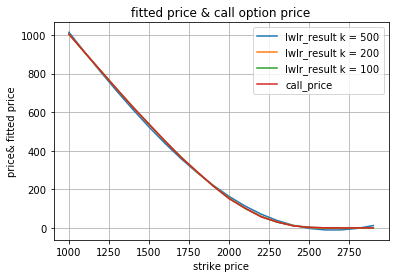

In [0]:
## Plot the fitted value with different k
plt.plot(strike,lwlr_result_500)
plt.plot(strike,lwlr_result_200)
plt.plot(strike,lwlr_result_100)
plt.plot(strike,call_price)
plt.xlabel('strike price')
plt.ylabel('price& fitted price')
plt.title('fitted price & call option price')
plt.grid(True)  
plt.axis('tight') 
plt.legend(['lwlr_result k = 500','lwlr_result k = 200', 'lwlr_result k = 100','call_price'], loc='best')

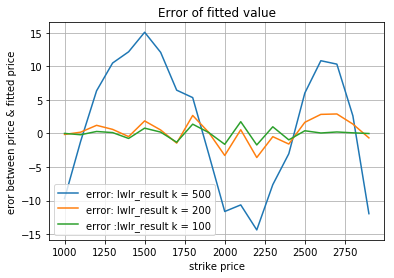

In [0]:
## Plot the error term
plt.plot(strike,(call_price-lwlr_result_500))
plt.plot(strike,(call_price-lwlr_result_200))
plt.plot(strike,(call_price-lwlr_result_100))
plt.xlabel('strike price')
plt.ylabel('eror between price & fitted price')
plt.title('Error of fitted value')
plt.grid(True)  
plt.axis('tight') 
plt.legend(['error: lwlr_result k = 500','error: lwlr_result k = 200', 'error :lwlr_result k = 100'], loc='best')

As is shown above, our Algo can be successful when take appropriate $k$. 

Then we consider the second-order derivatives:

In [0]:
## Try to get the second-order partial derivatives
    
## k = 500:
lwlr_2nd_order_result_500 = []
for x in np.linspace(2900,500,1001):
    lwlr_2nd_order_result_500.append(float(LWLR(input_X,matrix_call_price,x,500,2)))
    
## k = 200:
lwlr_2nd_order_result_200 = []
for x in np.linspace(2900,500,1001):
    lwlr_2nd_order_result_200.append(float(LWLR(input_X,matrix_call_price,x,200,2)))
      
## k = 100:
lwlr_2nd_order_result_100 = []
for x in np.linspace(2900,500,1001):
    lwlr_2nd_order_result_100.append(float(LWLR(input_X,matrix_call_price,x,100,2)))

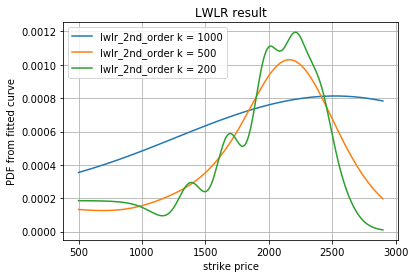

In [0]:

plt.plot(np.linspace(2900,500,1001),lwlr_2nd_order_result_500)
plt.plot(np.linspace(2900,500,1001),lwlr_2nd_order_result_200)
plt.plot(np.linspace(2900,500,1001),lwlr_2nd_order_result_100)
plt.xlabel('strike price')
plt.ylabel('PDF from fitted curve')
plt.grid(True)  
plt.axis('tight') 
plt.title('LWLR result')
plt.legend(['lwlr_2nd_order k = 1000','lwlr_2nd_order k = 500', 'lwlr_2nd_order k = 200','lwlr_result k = 100'], loc='best')

This LWLR Algorithm can make the curve much more smooth and can help us predict the fitted value of all orders in a more wider range. Compared to the naive difference method, where we can only compute limited data at sample points, now we can draw a plot of a much bigger range.


Another method is to use splines to fit the scatter plots of the 'call-price v.s. strike-price' graph, and then use the smoothed curves to calculate the second order difference $\frac{ C(k_{j+1}) -2C(k_{j})+ C(k_{j - 1}) } {h^2}$,with little $h$ since we already have smooth curve,  to approximate the seconde order partial derivative $\frac{\partial^2{C(k)}}{\partial{k^2}}$.

The splines method have in-built package in Scipy.

So we just need to :


In [0]:
from scipy.interpolate import interp1d

In [0]:
x = strike
print x
y = call_price
print y
f = interp1d(x, y,kind = 'linear')
f2 = interp1d(x, y, kind='cubic')

[ 2900.  2800.  2700.  2600.  2500.  2400.  2300.  2200.  2100.  2000.
  1900.  1800.  1700.  1600.  1500.  1400.  1300.  1200.  1100.  1000.]
[  8.42154720e-13   2.45123657e-05   3.88546881e-03   3.09208812e-01
   3.28826606e+00   1.03713752e+01   3.04198970e+01   5.69097051e+01
   1.02363157e+02   1.51370346e+02   2.17888337e+02   2.91793921e+02
   3.65447285e+02   4.50138225e+02   5.38098817e+02   6.25413714e+02
   7.18593570e+02   8.13286380e+02   9.07902363e+02   1.00437551e+03]


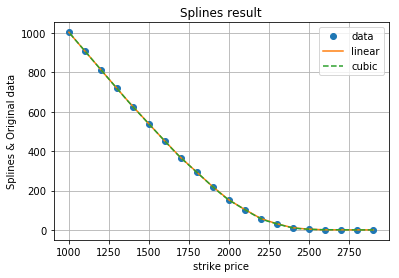

In [0]:
xnew = np.linspace(2900, 1000, num=1000, endpoint=True)    
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.xlabel('strike price')
plt.ylabel('Splines & Original data')
plt.grid(True)  
plt.axis('tight') 
plt.title('Splines result')
plt.show()

In [0]:
np.linspace(2900, 1000, num=1000, endpoint=True) 
h_spline = xnew[1] - xnew[2]
h_spline

1.9019019019019652

For a fitted value, spline methods also have great performance. Then we try to take sample points to estimate the second-order derivatives.

In [0]:
spline_second_order_linear = [(f(xnew[i+1]) + f(xnew[i-1]) - 2*f(xnew[i]))/(h_spline*h_spline) for i in range(1,999)] 
spline_second_order_cubic = [(f2(xnew[i+1]) + f2(xnew[i-1]) - 2*f2(xnew[i]))/(h_spline*h_spline) for i in range(1,999)] 

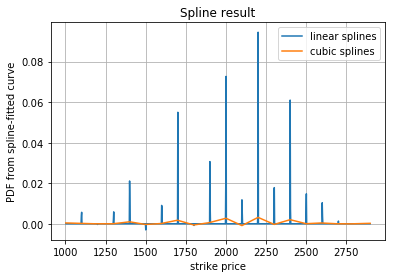

In [0]:
plt.plot(xnew[1:999],spline_second_order_linear)
plt.plot(xnew[1:999],spline_second_order_cubic)
plt.xlabel('strike price')
plt.ylabel('PDF from spline-fitted curve')
plt.grid(True)  
plt.axis('tight') 
plt.title('Spline result')
plt.legend(['linear splines','cubic splines'], loc='best')

As we can see from the above graph, here we try to use cubic splines and linear splines. We can get the fitted price value with high accuracy, but the PDF function is still zigzagging. 